In [273]:
import pandas as pd

In [274]:
df = pd.read_csv("data/Foodsystems_impact.csv")
df.head()

,Date,Country,Country ISO,Admin 1,Latitude,Longitude,Geo Precision,Reported Perpetrator,Reported Perpetrator Name,Weapon Carried/Used,Food System Impact,All Food Security Categories,Event ID,Date Event Entered,Date Event Modified
0,30/9/2025,OPT,PSE,Gaza Strip,"31,46959259","34,43115108",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118871,16/10/2025,16/10/2025
1,30/9/2025,OPT,PSE,Gaza Strip,"31,45195058","34,41072475",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118874,16/10/2025,16/10/2025
2,29/9/2025,OPT,PSE,Gaza Strip,"31,2830204","34,2805069","(3) District, Municipality or Commune",Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118734,13/10/2025,14/10/2025
3,29/9/2025,OPT,PSE,Gaza Strip,"31,4851626","34,4146933",(2) 25 km precision,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118897,16/10/2025,16/10/2025
4,28/9/2025,OPT,PSE,Gaza Strip,"31,3084659","34,2865698",(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118694,12/10/2025,12/10/2025


In [ ]:
df.info() # info of the datatype inside the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          1005 non-null   object
 1   Country                       1005 non-null   object
 2   Country ISO                   1005 non-null   object
 3   Admin 1                       1005 non-null   object
 4   Latitude                      1005 non-null   object
 5   Longitude                     1005 non-null   object
 6   Geo Precision                 1005 non-null   object
 7   Reported Perpetrator          1005 non-null   object
 8   Reported Perpetrator Name     1005 non-null   object
 9   Weapon Carried/Used           1005 non-null   object
 10  Food System Impact            1005 non-null   object
 11  All Food Security Categories  992 non-null    object
 12  Event ID                      1005 non-null   int64 
 13  Date Event Entered

In [276]:
df.shape #rows and columns

(1005, 15)

## Target variable: Food System Impact

Column by Column:
- Date : In datetime format, we will keep
- Country: Only single value, also its categorical, rejected
- Country ISO: Only single value, also its categorical, rejected
- Admin 1: Only single value, also its categorical, rejected
- Latitude: Will convert this into float and keep it
- Longitude: Will convert this into float and keep it
- Geo Precision: I will get rid of the numbering in the start using replace and then LabelEncode it myself.
- Reported Perpetrator: Categorical, not well distributed. 1001 and 4. Rejected
- Reported Perpetrator Name: Categorical, not well distributed. 1001, 1, 1 ,1 ,1 ,1. Rejected
- Weapon Carried/Used: Will labelencode it and keep it.
- All Food Security Categories: Will do feature engineering. I will get the count of food distribution system impacted using the column “All Food Security Categories” and keep that column to see the impact of the attack.
- Event ID, Date Event Entered, and Date Event Modified: These are not contributing to our business problem
I will perform Cooralation Matrix to further decide if I will be keeping them or not.

In [277]:
df['All Food Security Categories'].value_counts()

All Food Security Categories
Incident Affecting People Seeking Food Aid, Attack On Distribution Site                                                                                                                                                               348
Damage/Destruction Of Agricultural Land                                                                                                                                                                                               180
Attack On Persons Carrying Out Food Activity                                                                                                                                                                                           92
Attack On a Market/Restaurant/Supermarket/Bakery                                                                                                                                                                                       86
Attack On a Market/Restaurant/Super

# **Cleaned the Column Names**

In [278]:
df.columns = df.columns.str.strip().str.replace(" ", "_") # we use the "_" to turn into a single string. First accesses the list of all column names. Removes any trailing whitespace(strip) from the beginning to the end of every column name. Replaces all remaining spaces with underscores. Assigns the new, standardized list of names back to the DataFrame.
df.columns

Index(['Date', 'Country', 'Country_ISO', 'Admin_1', 'Latitude', 'Longitude',
       'Geo_Precision', 'Reported_Perpetrator', 'Reported_Perpetrator_Name',
       'Weapon_Carried/Used', 'Food_System_Impact',
       'All_Food_Security_Categories', 'Event_ID', 'Date_Event_Entered',
       'Date_Event_Modified'],
      dtype='object')

# **This Converts Date Columns to datetime**

In [279]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)   # converts into a format to understand best with day first
df['Date_Event_Entered'] = pd.to_datetime(df['Date_Event_Entered'], dayfirst = True)
df['Date_Event_Modified'] = pd.to_datetime(df['Date_Event_Modified'], dayfirst = True)

# **Removing Commas and Converting the Latitude and Longitudes to Float**

In [280]:
df['Latitude'] = df['Latitude'].astype(str).str.replace(',', '.').astype(float) # convert it into a string, as only work on string type, then no more strings operations and converts this into float 
df['Longitude'] = df['Longitude'].astype(str).str.replace(',', '.').astype(float)

In [281]:
print(df[['Latitude', 'Longitude']].head())

    Latitude  Longitude
0  31.469593  34.431151
1  31.451951  34.410725
2  31.283020  34.280507
3  31.485163  34.414693
4  31.308466  34.286570


In [282]:
df.head()

,Date,Country,Country_ISO,Admin_1,Latitude,Longitude,Geo_Precision,Reported_Perpetrator,Reported_Perpetrator_Name,Weapon_Carried/Used,Food_System_Impact,All_Food_Security_Categories,Event_ID,Date_Event_Entered,Date_Event_Modified
0,2025-09-30,OPT,PSE,Gaza Strip,31.469593,34.431151,(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118871,2025-10-16,2025-10-16
1,2025-09-30,OPT,PSE,Gaza Strip,31.451951,34.410725,(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118874,2025-10-16,2025-10-16
2,2025-09-29,OPT,PSE,Gaza Strip,31.283020,34.280507,"(3) District, Municipality or Commune",Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118734,2025-10-13,2025-10-14
3,2025-09-29,OPT,PSE,Gaza Strip,31.485163,34.414693,(2) 25 km precision,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118897,2025-10-16,2025-10-16
4,2025-09-28,OPT,PSE,Gaza Strip,31.308466,34.286570,(5) Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118694,2025-10-12,2025-10-12


# **Cleaning the Geo_Precision column**

In [283]:
df['Geo_Precision'] = df['Geo_Precision'].str[4:] # from 4 letter onwards

In [284]:
df['Geo_Precision'].head()

0    Linear feature e.g. along a road or river
1    Linear feature e.g. along a road or river
2            District, Municipality or Commune
3                              25 km precision
4    Linear feature e.g. along a road or river
Name: Geo_Precision, dtype: object

# **Performing Feature Engineering to Keep the count only for "All Food Security Categories" column**

In [297]:
def count_food_items(text):    # The text is replaced by the count (instead of the text). using feature engineering, otherwise the model will be cheating, how many food categories are affected. The column of the categories is important and I don't want to loose. There's a strong correlation between my target and the food categories so it will be easy to predict the other as they both are so close related. I convert it into a count. I am giving the model a fair model. 
  text = str(text)  # The function counts food items text, the text turns into a string text. 
  items = text.split(",") # There is a superpower of string based on split with comma. Then storing all the items in a list. A new item is being created 
  return len(items) # length items, how many items are inside the list.

df["All_Food_Security_Categories_Count"] = df["All_Food_Security_Categories"].apply(count_food_items)

df.head()

,Date,Country,Country_ISO,Admin_1,Latitude,Longitude,Geo_Precision,Reported_Perpetrator,Reported_Perpetrator_Name,Weapon_Carried/Used,Food_System_Impact,All_Food_Security_Categories,Event_ID,Date_Event_Entered,Date_Event_Modified,All_Food_Security_Categories_Count
0,2025-09-30,OPT,PSE,Gaza Strip,31.469593,34.431151,Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118871,2025-10-16,2025-10-16,2
1,2025-09-30,OPT,PSE,Gaza Strip,31.451951,34.410725,Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118874,2025-10-16,2025-10-16,2
2,2025-09-29,OPT,PSE,Gaza Strip,31.283020,34.280507,"District, Municipality or Commune",Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118734,2025-10-13,2025-10-14,2
3,2025-09-29,OPT,PSE,Gaza Strip,31.485163,34.414693,25 km precision,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118897,2025-10-16,2025-10-16,2
4,2025-09-28,OPT,PSE,Gaza Strip,31.308466,34.286570,Linear feature e.g. along a road or river,Host Government: Military,Israeli Defence Forces,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",118694,2025-10-12,2025-10-12,2


# **Dropping Columns that I dont need**

In [ ]:
df = df.drop([  # dropping columns I don't need
'Country',
'Country_ISO',
'Admin_1',
'Reported_Perpetrator',
'Reported_Perpetrator_Name',
'Event_ID',
'Date_Event_Entered',
'Date_Event_Modified'
], axis = 1)

In [ ]:
df.head()

,Date,Latitude,Longitude,Geo_Precision,Weapon_Carried/Used,Food_System_Impact,All_Food_Security_Categories,All_Food_Security_Categories_Count
0,2025-09-30,31.469593,34.431151,Linear feature e.g. along a road or river,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2
1,2025-09-30,31.451951,34.410725,Linear feature e.g. along a road or river,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2
2,2025-09-29,31.283020,34.280507,"District, Municipality or Commune",Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2
3,2025-09-29,31.485163,34.414693,25 km precision,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2
4,2025-09-28,31.308466,34.286570,Linear feature e.g. along a road or river,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2


# **Lets encode the categorical Columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder() # categorical columns into numbers. pros: have more values vs One hot encoder (either 0 or 1). One hot encoder doesn't have much labels to give.
df["Geo_Precision_Encoded"] = le.fit_transform(df['Geo_Precision']) # if it woule be One hot encoder: for each unique value I'd create a column for each (one hot encoder, for instance for 10 unique values, 10 new columns and mark 0 or 1)
df["Weapon_Used_Encoded"] = le.fit_transform(df['Weapon_Carried/Used']) # with label encoder will split the target only in 1 column vs one hot encoder will make separate  for target, the target will be splited into 3 columns (one hot encoder)
df["Food_System_Impact_Encoded"] = le.fit_transform(df['Food_System_Impact']) # target will not be/cannot be splited into multiple columns with label encode

# will perform the function le.fit_transform converting categorical values into numeric values

In [ ]:
df["Food_System_Impact_Encoded"].value_counts()

Food_System_Impact_Encoded
0     452
3     197
5     171
11     95
4      22
7      20
1      17
10     13
8       8
9       5
6       3
2       2
Name: count, dtype: int64

In [ ]:
df['Food_System_Impact'].value_counts()

Food_System_Impact
Aid Systems                                                    452
Food Production                                                197
Food Supply                                                    171
People Carrying Out Food Activity                               95
Food Production, People Carrying Out Food Activity              22
Food Supply, Aid Systems, People Carrying Out Food Activity     20
Aid Systems, People Carrying Out Food Activity                  17
Not Applicable                                                  13
Food Supply, Food Production                                     8
Food Supply, People Carrying Out Food Activity                   5
Food Supply, Aid Systems                                         3
Energy Systems                                                   2
Name: count, dtype: int64

In [ ]:
df['All_Food_Security_Categories_Count'].value_counts()

All_Food_Security_Categories_Count
1    491
2    463
3     31
4     18
5      2
Name: count, dtype: int64

In [ ]:
df['All_Food_Security_Categories'].value_counts()

All_Food_Security_Categories
Incident Affecting People Seeking Food Aid, Attack On Distribution Site                                                                                                                                                               348
Damage/Destruction Of Agricultural Land                                                                                                                                                                                               180
Attack On Persons Carrying Out Food Activity                                                                                                                                                                                           92
Attack On a Market/Restaurant/Supermarket/Bakery                                                                                                                                                                                       86
Attack On a Market/Restaurant/Super

In [ ]:
df['Food_System_Impact_Encoded'].value_counts()

Food_System_Impact_Encoded
0     452
3     197
5     171
11     95
4      22
7      20
1      17
10     13
8       8
9       5
6       3
2       2
Name: count, dtype: int64

In [ ]:
df.head(200)

,Date,Latitude,Longitude,Geo_Precision,Weapon_Carried/Used,Food_System_Impact,All_Food_Security_Categories,All_Food_Security_Categories_Count,Geo_Precision_Encoded,Weapon_Used_Encoded,Food_System_Impact_Encoded
0,2025-09-30,31.469593,34.431151,Linear feature e.g. along a road or river,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2,3,7,0
1,2025-09-30,31.451951,34.410725,Linear feature e.g. along a road or river,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2,3,7,0
2,2025-09-29,31.283020,34.280507,"District, Municipality or Commune",Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2,1,7,0
3,2025-09-29,31.485163,34.414693,25 km precision,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2,0,7,0
4,2025-09-28,31.308466,34.286570,Linear feature e.g. along a road or river,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...
195,2025-08-05,31.417800,34.350300,25 km precision,Aerial Bomb: Plane,Food Production,Damage/Destruction Of Agricultural Land,1,0,2,3
196,2025-08-05,31.417800,34.350300,25 km precision,Aerial Bomb: Plane,Food Production,Damage/Destruction Of Agricultural Land,1,0,2,3
197,2025-08-05,31.303378,34.282710,Linear feature e.g. along a road or river,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2,3,7,0
198,2025-08-05,31.535602,34.447030,25 km precision,Firearms,Aid Systems,"Incident Affecting People Seeking Food Aid, At...",2,0,7,0


# **Dropping Original Text Columns**

In [ ]:
df = df.drop([
'Geo_Precision',
'Weapon_Carried/Used',
'Food_System_Impact',
'All_Food_Security_Categories'
], axis = 1)

In [ ]:
df.head(20)

,Date,Latitude,Longitude,All_Food_Security_Categories_Count,Geo_Precision_Encoded,Weapon_Used_Encoded,Food_System_Impact_Encoded
0,2025-09-30,31.469593,34.431151,2,3,7,0
1,2025-09-30,31.451951,34.410725,2,3,7,0
2,2025-09-29,31.283020,34.280507,2,1,7,0
3,2025-09-29,31.485163,34.414693,2,0,7,0
4,2025-09-28,31.308466,34.286570,2,3,7,0
5,2025-09-26,31.308466,34.286570,2,3,7,0
6,2025-09-26,31.292927,34.249867,2,0,7,0
7,2025-04-07,31.357629,34.262293,5,0,0,7
8,2025-09-25,31.458613,34.444217,2,3,7,0
9,2025-09-24,31.292927,34.249867,2,0,7,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

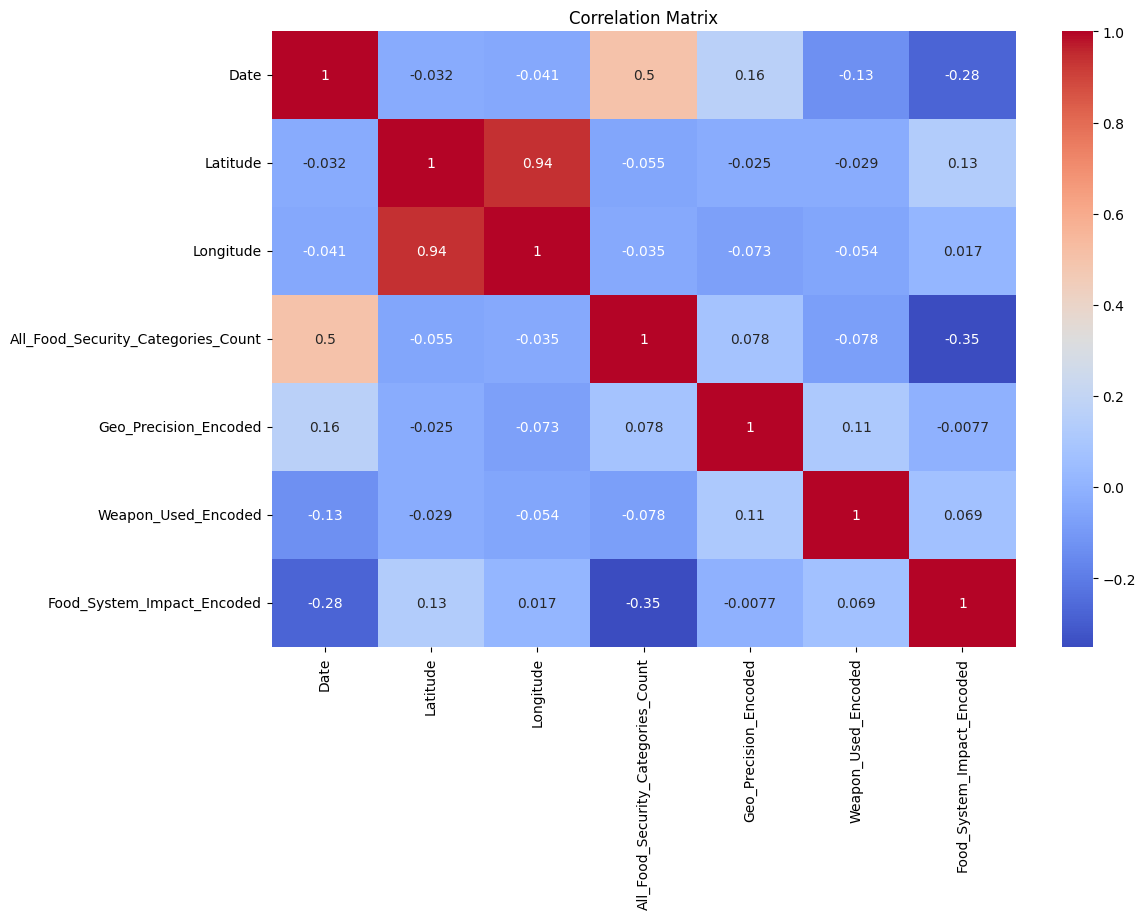

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
df

,Date,Latitude,Longitude,All_Food_Security_Categories_Count,Geo_Precision_Encoded,Weapon_Used_Encoded,Food_System_Impact_Encoded
0,2025-09-30,31.469593,34.431151,2,3,7,0
1,2025-09-30,31.451951,34.410725,2,3,7,0
2,2025-09-29,31.283020,34.280507,2,1,7,0
3,2025-09-29,31.485163,34.414693,2,0,7,0
4,2025-09-28,31.308466,34.286570,2,3,7,0
...,...,...,...,...,...,...,...
1000,2023-10-07,31.528215,34.484024,1,0,23,10
1001,2023-10-07,31.534900,34.466700,1,0,2,3
1002,2023-10-07,31.554100,34.501600,1,0,2,3
1003,2023-10-07,31.554100,34.501600,1,0,2,3


In [ ]:
X = df[
['Latitude', 'Longitude', 'All_Food_Security_Categories_Count','Geo_Precision_Encoded', 'Weapon_Used_Encoded']
]

y = df['Food_System_Impact_Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
    )

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.6666666666666666


In [298]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7562189054726368
